(2022) Josué Daniel Torres Santos

Módulo 2: Introducción a la Ciencia de Datos

Challenge: Visualización de Datos

# Challenge: Personas desaparecidas

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


EL siguiente dataset es un conjunto de datos acerca de personas desaperecidas en la república mexicana, del año 2010 al 2015.

### Diccionario de datos:

- inegi: Clave dada por el INEGI a cada municipio. Primeros dos dígitos 
- corresponden al estado, los siguientes tres al municipio
- ent: Parte de la clave de INEGI que corresponde a la entidad federativa.
- nom_ent: Nombre oficial de la entidad federativa.
- year: Año en el que se denunciaron las despariciones
- sexo: Sexo de las personas desaparecidas
- rango_edad: Rango de edades de las personas en el grupo en cuestión.
- pob: Población total del municipio en ese año para ese grupo.
- total: Total de personas deparecidas de ese grupo en ese año.
- tdes: Tasa de desaparecidos en ese municipio en ese grupo

Nota: Recuerda, cada observación corresponde a un grupo de personas desparecidas de un cierto sexo, en un cierto municipio y un cierto rango de edad.

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline #Se utilizar para mostrar la gráfica inmediatamente después del código 
import seaborn as sns

In [33]:
df = pd.read_csv("/content/drive/MyDrive/0. Master en DS+AI/0. Presentaciones y ejercicios/1. Introducción a la Ciencia de Datos/5. Data Visualization/data/rnped_limpia.csv")
df

,inegi,ent,nom_ent,mun,nom_mun,year,sexo,rango_edad,pob,total,tdes
0,1001,1,Aguascalientes,1,Aguascalientes,2010,Hombre,0 a 11 años,95973,1,1.04
1,1001,1,Aguascalientes,1,Aguascalientes,2010,Hombre,12 a 17 años,45451,0,0.00
2,1001,1,Aguascalientes,1,Aguascalientes,2010,Hombre,18 a 25 años,56448,1,1.77
3,1001,1,Aguascalientes,1,Aguascalientes,2010,Hombre,26 a 40 años,86660,0,0.00
4,1001,1,Aguascalientes,1,Aguascalientes,2010,Hombre,41 a 64 años,80618,2,2.48
...,...,...,...,...,...,...,...,...,...,...,...
176839,32058,32,Zacatecas,58,Santa María de la Paz,2015,Mujer,12 a 17 años,131,0,0.00
176840,32058,32,Zacatecas,58,Santa María de la Paz,2015,Mujer,18 a 25 años,139,0,0.00
176841,32058,32,Zacatecas,58,Santa María de la Paz,2015,Mujer,26 a 40 años,275,0,0.00
176842,32058,32,Zacatecas,58,Santa María de la Paz,2015,Mujer,41 a 64 años,332,0,0.00


## Instrucciones
Hay 3 preguntas clave que podemos responder con estos datos.

1. ¿Cuántos desaparecidos hubo por municipio en...2011 (año más violento)?
2. ¿Cuál es el porcentaje de desaparecidos por entidad en el año 2011?
3. ¿Cuál es la tendencia de la tasa de desaparecidos en los años del 2010 al 2015 tomando en cuenta una línea por cada género?

#### Pregunta 1: ¿Cuántos desaparecidos hubo por municipio en...2011 (año más violento)?
Esta primera gráfica será un scatter, pero que va a cumplir la función de las barras dado que vamos a graficar 2,456 municipios

<img src="https://storage.googleapis.com/campus-cvs/lectures/4.1%20DataVizChallenge2-1.png" alt="scatter plot" title="Total de desaparecidos por municipio" width="850" height="400" />

In [34]:
#codigo aqui
#¿Cuántos desaparecidos hubo por municipio en...2011 (año más violento)?
df1 = df.copy()
cond1 = df1.loc[:,'year'] ==2011
df1=df1[cond1]

In [35]:
df1=df1[['nom_mun','total']]
group1 = df1.groupby('nom_mun', as_index=False).sum()

Text(0, 0.5, 'Número de desaparecidos')

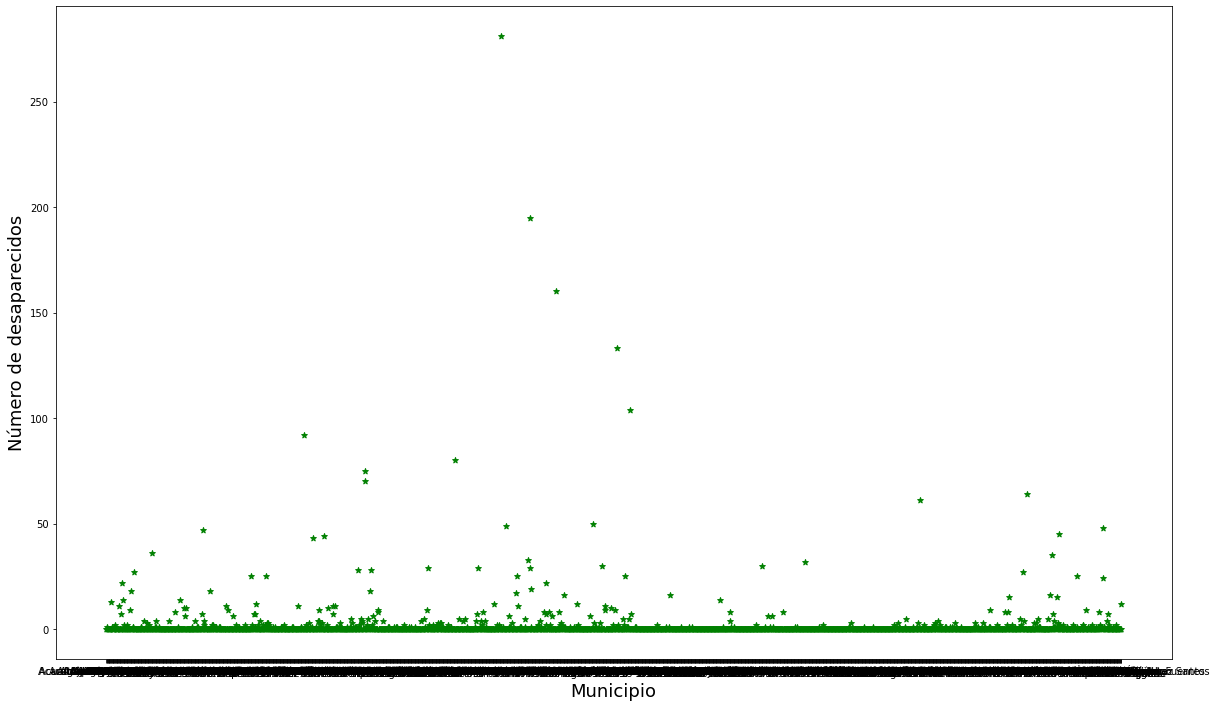

In [43]:
plt.figure(figsize=(20,12)) 
graf1=plt.scatter(x='nom_mun', y='total', data=group1, c="green", marker="*")
plt.title=('Total de desaparecidos por municipio en 2011')
plt.xlabel('Municipio', fontsize=18)
plt.ylabel('Número de desaparecidos',fontsize=18)

## Pregunta 2: ¿Cuál es la tendencia de la tasa de desaparecidos en los años del 2010 al 2015 tomando en cuenta una línea por cada género?
Esta gráfica será una gráfica línea. Lo importante es conocer la diferencia en las tasas de desaparecidos por cada año y cada línea debe corresponder a un género.

<img src="https://storage.googleapis.com/campus-cvs/lectures/4.1%20DataVizChallenge2-3.png" alt="scatter plot" title="Total de desaparecidos por municipio" width="850" height="400" />

In [37]:
#codigo aqui
df2 = df.copy()
cond1 = df2.loc[:,'year'] >=2010
cond2 = df2.loc[:,'year'] <=2015
df2=df2[(cond1)&(cond2)]


In [38]:
df2=df2[['year','total','sexo']]

agrup2 = df2.groupby(['sexo','year'], as_index=False).sum()

Text(26.772421874999992, 0.5, 'Total de desaparecidos')

<Figure size 1008x576 with 0 Axes>

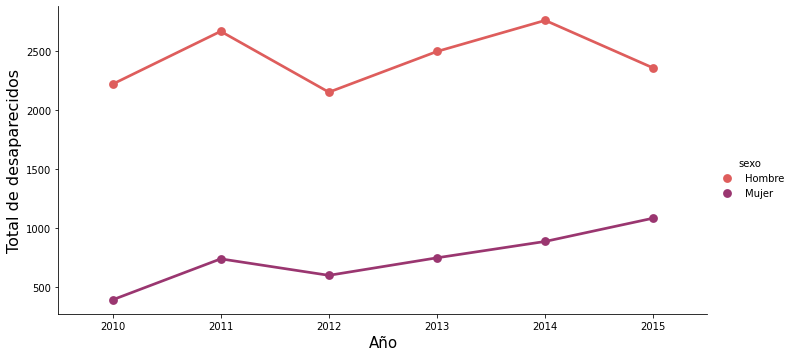

In [39]:
plt.figure(figsize=(14,8)) 
sns.catplot(x="year", y="total", hue="sexo",
            palette="flare",
            markers=["o", "o"], linestyles=["-", "-"],
            kind="point",  aspect=2, data=agrup2)
plt.xlabel("Año",fontsize = 15)
plt.ylabel("Total de desaparecidos",fontsize = 16)

## Pregunta 3: ¿Cuál es la tasa de desaparecidos por género y rango de edad?
Esta gráfica queda a elección del alumno. Como sugerencia, puede utilizar un mapa de calor.

<img src="https://storage.googleapis.com/campus-cvs/lectures/4.1%20DataVizChallenge3-3.png" alt="scatter plot" title="Total de desaparecidos por municipio" width="850" height="400" />

In [40]:
#codigo aqui
df3 = df.copy()
df3=df3[['rango_edad','total','sexo']]
agrup3 = df3.groupby(['rango_edad','sexo'], as_index=False).sum()
agrup3 = agrup3.pivot('rango_edad','sexo','total')
agrup3

sexo,Hombre,Mujer
rango_edad,,
0 a 11 años,282,242
12 a 17 años,1160,1539
18 a 25 años,3343,1086
26 a 40 años,6100,1046
41 a 64 años,3267,441
65 o más años,518,89


Text(114.0, 0.5, 'Edad')

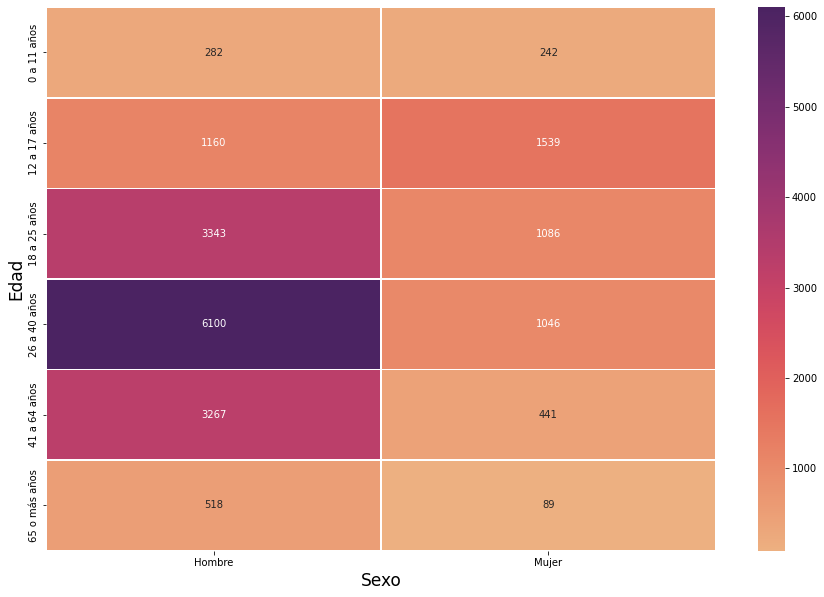

In [41]:
plt.figure(figsize=(15,10)) 
agraf3 = sns.heatmap(agrup3, cmap="flare",
                     linewidths=.5,annot=True,
                     fmt="d")
plt.xlabel("Sexo",fontsize = 17)
plt.ylabel("Edad",fontsize = 17)